In [158]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

pd.set_option('max_column', 100)

In [159]:
raw_path = '../../dataset/raw/'
mst_path = '../../dataset/mst/'
fig_path = '../../export/01_summary_stats_ebike/'

In [160]:
os.listdir(mst_path)

['Participant_Survey.csv', 'question_lookup.csv']

In [161]:
#Function to replace spaces with underscores and removing \xa0
def clean_space(c):
    return c.lower().strip().replace(" ", "_")

In [193]:
#load in clean data
df = pd.read_csv(mst_path+"Participant_Survey.csv")
df.head()

,respondent_id,collector_id,start_date,end_date,ip_address,email_address,first_name,last_name,custom_data_1,"what_brand/type_of_e-bike_did_you_buy_(e.g.,_sonders_x)?",how_much_did_your_e-bike_cost_(before_the_rebate)?,"overall,_how_satisfied_are_you_with_your_e-bike?","why_do_you_like_or_dislike_your_e-bike?_what,_if_any,_other_thoughts_would_you_like_to_share_about_your_e-bike?",how_much_did_the_$700_rebate_influence_your_decision_to_purchase_an_e-bike?,how_far_is_your_average_trip_by_e-bike?,for_what_purpose_aremost_of_your_e-bike_rides?,business/work_use,injury_or_disability,sustainability_/_environmental_benefits,cargo_hauling,recreation_or_exercise,transport_children,save_money_/_reducetransportation_costs,hills,other_(please_specify),"social_media_(e.g.,_facebook,_instagram,_twitter)",news_article,bikesgv_listserve/email,friend/family/colleague,flyer,poster,other_(please_specify).1,how_familiar_were_you_with_e-bikes_before_hearing_about_this_rebate_program?,bicycle_(regular),electric_bicycle_(e-bike),working_motor_vehicle,scooter,motorcycle,none_of_the_above,walked,biked,skated_/_scooted,used_public_transit,carpooled_/_rode_as_a_passenger,used_ride_share_service_(lyft/uber),drove_car_/_motorcycle,walked.1,biked.1,skated_/_scooted.1,used_public_transit.1,carpooled_/_rode_as_a_passenger.1,used_ride_share_service_(lyft/uber).1,drove_car_/_motorcycle.1,how_oftendid_you_bicycle_for_any_purposebefore_purchasing_an_e-bike?,how_often_do_you_bicyclefor_any_purposesince_purchasing_an_e-bike?,do_you_use_your_e-bike_for_some_trips_that_you_used_to_take_by_car?,"have_youused_your_e-bikeon_a_river_path_or_‘greenway’_in_the_past_12_months?_(e.g.,_san_gabriel_river_or_rio_hondo_river_trails)",how_easy_or_difficult_is_it_to_bicycle_in_your_community?,did_your_level_of_comfort_riding_a_bicycle_in_traffic_increase_after_taking_the_city_cycling_class?,off-street_greenways_/_multi-use_paths,on-street_separated_/_physically_‘protected’_bikeways,buffered_bike_lanes,color_painted_bike_lanes,striped_bike_lanes,"bike_routes_(signage,_sharrows)",how_safe_doyou_feel_riding_a_bicycle_in_traffic?,"what_barriers_to_using_your_e-bike_have_you_encountered_thus_far,_if_any?",how_many_members_of_your_household_use_your_e-bike_at_least_once_a_month?,response,other_(please_specify).2,would_you_like_to_see_future_e-bike_rebate_programs?,should_future_programsexpand_the_list_of_eligible_light_electric_vehicles_to_include_electric-scooters_and_similar_micro-mobility_devices?,"other_suggestions,_feedback,_or_comments_forproject_organizers.",community_of_residence,zip_code,number_of_persons_in_household,household_income,what_is_your_age_group?,electric_car,electric_motorcycle,electric_scooter,electric_skateboard,electric_wheel,"no,_i_do_not_own_other_evs",other_(please_specify).3,american_indian_or_alaska_native,asian/pacific_islander,black_or_african_american,hispanic_or_latino,white,multi-ethnic,decline_to_state,other_(please_specify).4,female,male,decline_to_state.1,other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open-Ended Response,Response,Response,Open-Ended Response,Response,Response,Response,Business/Work Use,Injury or Disability,Sustainability / Environmental Benefits,Cargo Hauling,Recreation or Exercise,Transport children,Save money / reduce transportation costs,Hills,Other (please specify),"Social Media (e.g., Facebook, Instagram, Twitter)",News article,BikeSGV listserve/email,Friend/family/colleague,Flyer,Poster,Other (please specify),Response,Bicycle (regular),Electric Bicycle (E-bike),Working motor vehicle,Scooter,Motorcycle,None of the above,Walked,Biked,Skated / Scooted,Used public transit,Carpooled / rode as a passenger,Used ride share service (Lyft/Uber),Drove car / motorcycle,Walked,Biked,Skated / Scooted,Used public transit,Carpooled / rode as a passenger,Used ride share service (Lyft/Uber),Drove car / motorcycle,Response,Response,Response,Response,Response,Response,Off-street greenways / multi-use paths,On-street separated / physically ‘protecte

In [216]:
#extract relevant collumn for transportation mode before and after
transport_mode = list(df.columns[39:53])
short_transport_mode = ['walked', 'biked', 'skated/scooted', 'used public transit', 
                      'carpooled', 'used ride share service', 'drove car/motorcycle']
print(transport_mode)


['walked', 'biked', 'skated_/_scooted', 'used_public_transit', 'carpooled_/_rode_as_a_passenger', 'used_ride_share_service_(lyft/uber)', 'drove_car_/_motorcycle', 'walked.1', 'biked.1', 'skated_/_scooted.1', 'used_public_transit.1', 'carpooled_/_rode_as_a_passenger.1', 'used_ride_share_service_(lyft/uber).1', 'drove_car_/_motorcycle.1']


In [217]:
#take count of how many responses in each collumn
row_num = df[transport_mode[0]].size
count = []
for col in transport_mode:
    #in a new row of count, if the entry stored in df is not null, then add it to the count
    count.append(row_num - df[col].isnull().sum())
print(count)

[17, 19, 3, 11, 6, 5, 30, 12, 28, 3, 10, 4, 4, 27]


In [218]:
#calculate the percentage change of transport_mode from having ebike

#create new dataFrame/table
res = pd.DataFrame()
res = res.reset_index()

unique_transports = int(len(transport_mode) / 2)
transports = []
percent_change = []
for i in range(unique_transports):
    transports.append(transport_mode[i].replace('_/_', '/').replace('_',' '))
    percent_change.append(count[i+unique_transports]/count[i] - 1)

transports[5] = 'used ride share service'
res["mode_of_transport"] = short_transport_mode
res["percentage_change"] = percent_change

print(res)

  index        mode_of_transport  percentage_change
0   NaN                   walked          -0.294118
1   NaN                    biked           0.473684
2   NaN           skated/scooted           0.000000
3   NaN      used public transit          -0.090909
4   NaN                carpooled          -0.333333
5   NaN  used ride share service          -0.200000
6   NaN     drove car/motorcycle          -0.100000


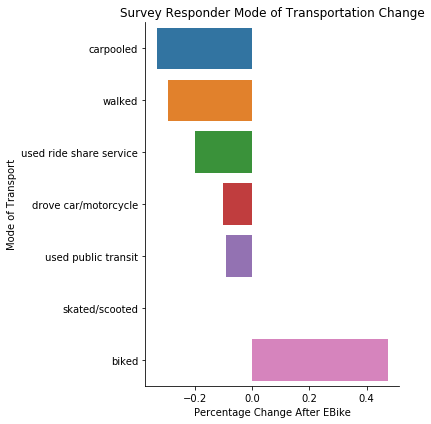

In [222]:
#Code got from David's previous semester project
temp = res.sort_values('percentage_change', ascending = True)[['mode_of_transport', 'percentage_change']]

g = sns.catplot(data = temp, y = 'mode_of_transport', x = 'percentage_change' ,orient = "h", kind = "bar", height = 6, legend=False)
g.despine()
plt.ylabel('Mode of Transport')
plt.xlabel('Percentage Change After EBike')
plt.title('Survey Responder Mode of Transportation Change')
plt.tight_layout()

plt.savefig(fig_path + 'surver_responder_mode_of_transportation_change', fmt = 'png', dpi = 300)
plt.show()

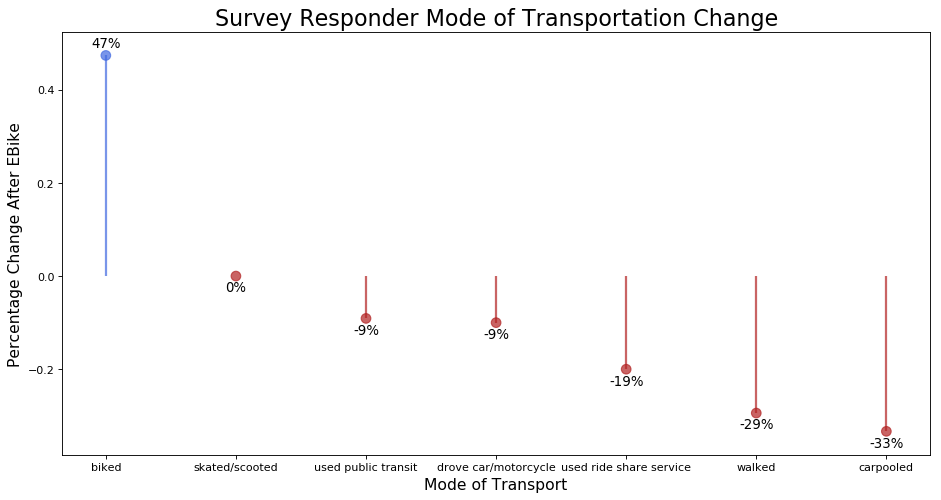

In [210]:
# Reorder it following the values:
temp = res.sort_values('percentage_change', ascending = False)
my_color=np.where(temp['mode_of_transport']=='biked', 'royalblue', 'firebrick')
 
# Vertical version.
fig, ax = plt.subplots(figsize=(14,7), dpi= 80)
ax.vlines(x=temp['mode_of_transport'], ymin=0, ymax=temp['percentage_change'], color=my_color, alpha=0.7, linewidth=2)
ax.scatter(x=temp['mode_of_transport'], y=temp['percentage_change'], s=75, color=my_color, alpha=0.7)

plt.xlabel('Mode of Transport', fontsize = 14)
plt.ylabel('Percentage Change After EBike', fontsize = 14)
plt.title('Survey Responder Mode of Transportation Change', fontsize = 20)

for row in temp.iterrows():
    if (row[0] == 1):
        ax.text(row[1][1],row[1][2]+.01,s=str(int(row[1][2]*100)) + '%', horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)
    else :
        ax.text(row[1][1],row[1][2]-.04,s=str(int(row[1][2]*100)) + '%', horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)

plt.savefig(fig_path + 'surver_responder_mode_of_transportation_change_lollipop', fmt = 'png', dpi = 300)
plt.show()

In [226]:
#add before and after to the collumn names in transport_mode

#create new dataFrame/table
res = pd.DataFrame()
res = res.reset_index()


short_transport_mode = ['walked', 'biked', 'skated/scooted', 'used public transit', 
                      'carpooled', 'used ride share service', 'drove car/motorcycle']
new_transport_mode = []
color = []
for col_name in (short_transport_mode):
    new_transport_mode.append(col_name + " before")
    color.append("before")
    new_transport_mode.append(col_name + " after")
    color.append("after")


res['mode_of_transport'] = new_transport_mode
res['total_count'] = count
res['color'] = color

print(res)

   index               mode_of_transport  total_count   color
0    NaN                   walked before           17  before
1    NaN                    walked after           19   after
2    NaN                    biked before            3  before
3    NaN                     biked after           11   after
4    NaN           skated/scooted before            6  before
5    NaN            skated/scooted after            5   after
6    NaN      used public transit before           30  before
7    NaN       used public transit after           12   after
8    NaN                carpooled before           28  before
9    NaN                 carpooled after            3   after
10   NaN  used ride share service before           10  before
11   NaN   used ride share service after            4   after
12   NaN     drove car/motorcycle before            4  before
13   NaN      drove car/motorcycle after           27   after


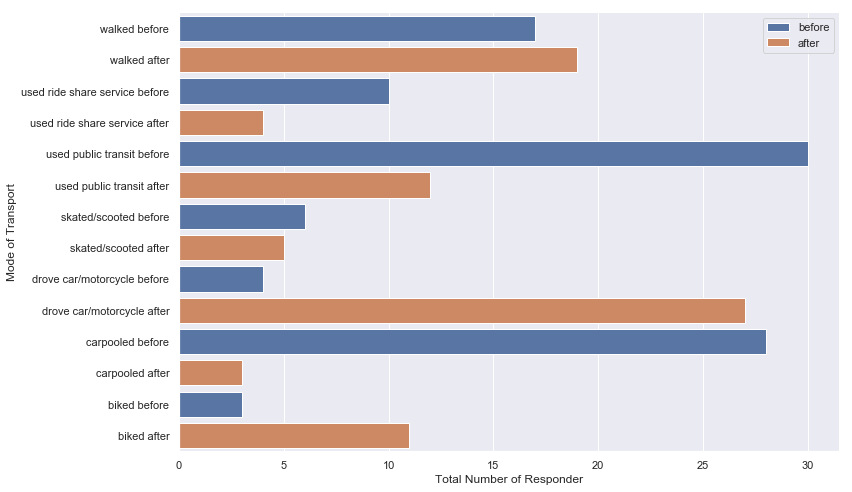

In [233]:
#Code got from David's previous semester project
temp = res.sort_values('mode_of_transport', ascending = False)[['mode_of_transport', 'total_count', 'color']]

sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data = temp, y = 'mode_of_transport', x = 'total_count', hue = 'color', orient = "h", dodge=False)
sns.despine()
plt.ylabel('Mode of Transport')
plt.xlabel('Total Number of Responder')
plt.legend()
plt.tight_layout()

plt.savefig(fig_path + 'surver_responder_mode_of_transportation', fmt = 'png', dpi = 300)
plt.show()

In [170]:
#Collect level of bike usage
bike_before = pd.DataFrame().reset_index()

bike_after = pd.DataFrame().reset_index()
bike_after = bike_before[:]

bike_after.head()

,index


In [171]:
#Count the frequencies
biking_freq = list()
freq_count = list()
for i in range(1,row_num):
    frequency = df['how_oftendid_you_bicycle_for_any_purposebefore_purchasing_an_e-bike?'][i]
    print(frequency)
    if frequency in biking_freq:
        index = biking_freq.index(frequency)
        freq_count[index] += 1
    else:
        biking_freq.append(frequency)
        freq_count.append(1)
        
bike_before['Biking_Frequency'] = biking_freq
bike_before['Frequency_Count'] = freq_count
        
bike_before.head()

1-11 times a year
1-11 times a year
1-2 days a week
Never
3+ days a week
1-3 times a month
3+ days a week
1-11 times a year
1-3 times a month
1-11 times a year
1-11 times a year
1-11 times a year
1-2 days a week
1-11 times a year
1-3 times a month
1-2 days a week
1-3 times a month
1-11 times a year
1-2 days a week
1-3 times a month
3+ days a week
1-11 times a year
1-3 times a month
1-11 times a year
Never
1-11 times a year
1-3 times a month
Never
3+ days a week
Never


,index,Biking_Frequency,Frequency_Count
0,NaN,1-11 times a year,11
1,NaN,1-2 days a week,4
2,NaN,Never,4
3,NaN,3+ days a week,4
4,NaN,1-3 times a month,7


In [172]:
print(bike_before)

  index   Biking_Frequency  Frequency_Count
0   NaN  1-11 times a year               11
1   NaN    1-2 days a week                4
2   NaN              Never                4
3   NaN     3+ days a week                4
4   NaN  1-3 times a month                7


In [173]:
# Plot
temp = bike_before.sort_values('Biking_Frequency', ascending = True)[['Biking_Frequency', 'Frequency_Count']]
print(temp)



    Biking_Frequency  Frequency_Count
0  1-11 times a year               11
1    1-2 days a week                4
4  1-3 times a month                7
3     3+ days a week                4
2              Never                4


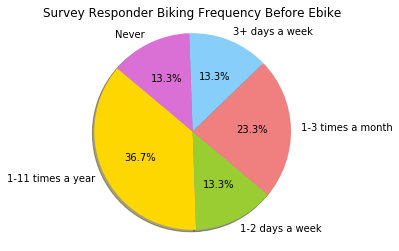

In [174]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orchid']
plt.pie(temp['Frequency_Count'], labels=temp['Biking_Frequency'], colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survey Responder Biking Frequency Before Ebike')
plt.axis('scaled')

plt.savefig(fig_path + 'surver_responder_biking_frequency_before_ebike', fmt = 'png', dpi = 300)
plt.show()

In [175]:
#Count the frequencies
biking_freq = list()
freq_count = list()
for i in range(1,row_num):
    frequency = df.loc[i,'how_often_do_you_bicyclefor_any_purposesince_purchasing_an_e-bike?']
    if frequency in biking_freq:
        index = biking_freq.index(frequency)
        freq_count[index] += 1
    else:
        biking_freq.append(frequency)
        freq_count.append(1)
        
bike_after.loc[:,'Biking_Frequency'] = biking_freq
bike_after.loc[:,'Frequency_Count'] = freq_count
        
bike_after.head()

C:\Users\Thuan\Anaconda3\lib\site-packages\pandas\core\indexing.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = value
C:\Users\Thuan\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Thuan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,index,Biking_Frequency,Frequency_Count
0,NaN,1-2 days a week,7
1,NaN,1-3 times a month,8
2,NaN,1-11 times a year,4
3,NaN,3+ days a week,11


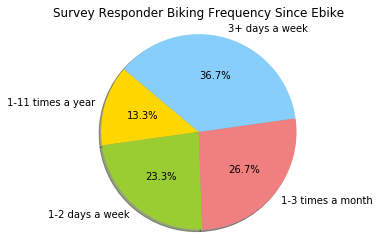

In [176]:
# Plot
temp = bike_after.sort_values('Biking_Frequency', ascending = True)[['Biking_Frequency', 'Frequency_Count']]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orchid']
plt.pie(temp['Frequency_Count'], labels=temp['Biking_Frequency'], colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survey Responder Biking Frequency Since Ebike')

plt.axis('scaled')
plt.savefig(fig_path + 'surver_responder_biking_frequency_since_ebike', fmt = 'png', dpi = 300)
plt.show()

In [177]:
# Go collect whether a person chose something; maybe by assigning each choice a number from 1-5
# Then Go compare what number changed from before ebike to after; Identify which number goes to which
# Collect that list of changes into another list, maybe from 11 -> 55 or 2d list, people who ended up chosing choice x
# then that contains a list of the originating mode of transportation
# all this time include with each line is an index of how safe people felt
# extension involve including the specific type of bike lane available and then do a correlation map

In [178]:
#load in clean data
df = pd.read_csv(mst_path+"Participant_Survey.csv")
df.head()

,respondent_id,collector_id,start_date,end_date,ip_address,email_address,first_name,last_name,custom_data_1,"what_brand/type_of_e-bike_did_you_buy_(e.g.,_sonders_x)?",how_much_did_your_e-bike_cost_(before_the_rebate)?,"overall,_how_satisfied_are_you_with_your_e-bike?","why_do_you_like_or_dislike_your_e-bike?_what,_if_any,_other_thoughts_would_you_like_to_share_about_your_e-bike?",how_much_did_the_$700_rebate_influence_your_decision_to_purchase_an_e-bike?,how_far_is_your_average_trip_by_e-bike?,for_what_purpose_aremost_of_your_e-bike_rides?,business/work_use,injury_or_disability,sustainability_/_environmental_benefits,cargo_hauling,recreation_or_exercise,transport_children,save_money_/_reducetransportation_costs,hills,other_(please_specify),"social_media_(e.g.,_facebook,_instagram,_twitter)",news_article,bikesgv_listserve/email,friend/family/colleague,flyer,poster,other_(please_specify).1,how_familiar_were_you_with_e-bikes_before_hearing_about_this_rebate_program?,bicycle_(regular),electric_bicycle_(e-bike),working_motor_vehicle,scooter,motorcycle,none_of_the_above,walked,biked,skated_/_scooted,used_public_transit,carpooled_/_rode_as_a_passenger,used_ride_share_service_(lyft/uber),drove_car_/_motorcycle,walked.1,biked.1,skated_/_scooted.1,used_public_transit.1,carpooled_/_rode_as_a_passenger.1,used_ride_share_service_(lyft/uber).1,drove_car_/_motorcycle.1,how_oftendid_you_bicycle_for_any_purposebefore_purchasing_an_e-bike?,how_often_do_you_bicyclefor_any_purposesince_purchasing_an_e-bike?,do_you_use_your_e-bike_for_some_trips_that_you_used_to_take_by_car?,"have_youused_your_e-bikeon_a_river_path_or_‘greenway’_in_the_past_12_months?_(e.g.,_san_gabriel_river_or_rio_hondo_river_trails)",how_easy_or_difficult_is_it_to_bicycle_in_your_community?,did_your_level_of_comfort_riding_a_bicycle_in_traffic_increase_after_taking_the_city_cycling_class?,off-street_greenways_/_multi-use_paths,on-street_separated_/_physically_‘protected’_bikeways,buffered_bike_lanes,color_painted_bike_lanes,striped_bike_lanes,"bike_routes_(signage,_sharrows)",how_safe_doyou_feel_riding_a_bicycle_in_traffic?,"what_barriers_to_using_your_e-bike_have_you_encountered_thus_far,_if_any?",how_many_members_of_your_household_use_your_e-bike_at_least_once_a_month?,response,other_(please_specify).2,would_you_like_to_see_future_e-bike_rebate_programs?,should_future_programsexpand_the_list_of_eligible_light_electric_vehicles_to_include_electric-scooters_and_similar_micro-mobility_devices?,"other_suggestions,_feedback,_or_comments_forproject_organizers.",community_of_residence,zip_code,number_of_persons_in_household,household_income,what_is_your_age_group?,electric_car,electric_motorcycle,electric_scooter,electric_skateboard,electric_wheel,"no,_i_do_not_own_other_evs",other_(please_specify).3,american_indian_or_alaska_native,asian/pacific_islander,black_or_african_american,hispanic_or_latino,white,multi-ethnic,decline_to_state,other_(please_specify).4,female,male,decline_to_state.1,other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open-Ended Response,Response,Response,Open-Ended Response,Response,Response,Response,Business/Work Use,Injury or Disability,Sustainability / Environmental Benefits,Cargo Hauling,Recreation or Exercise,Transport children,Save money / reduce transportation costs,Hills,Other (please specify),"Social Media (e.g., Facebook, Instagram, Twitter)",News article,BikeSGV listserve/email,Friend/family/colleague,Flyer,Poster,Other (please specify),Response,Bicycle (regular),Electric Bicycle (E-bike),Working motor vehicle,Scooter,Motorcycle,None of the above,Walked,Biked,Skated / Scooted,Used public transit,Carpooled / rode as a passenger,Used ride share service (Lyft/Uber),Drove car / motorcycle,Walked,Biked,Skated / Scooted,Used public transit,Carpooled / rode as a passenger,Used ride share service (Lyft/Uber),Drove car / motorcycle,Response,Response,Response,Response,Response,Response,Off-street greenways / multi-use paths,On-street separated / physically ‘protecte

In [179]:
#extract relevant collumn for transportation mode before and after
transport_mode = list(df.columns[39:53])
print(transport_mode)


['walked', 'biked', 'skated_/_scooted', 'used_public_transit', 'carpooled_/_rode_as_a_passenger', 'used_ride_share_service_(lyft/uber)', 'drove_car_/_motorcycle', 'walked.1', 'biked.1', 'skated_/_scooted.1', 'used_public_transit.1', 'carpooled_/_rode_as_a_passenger.1', 'used_ride_share_service_(lyft/uber).1', 'drove_car_/_motorcycle.1']


In [180]:
temp = pd.DataFrame().reset_index()
for mode in transport_mode:
    temp[mode] = df[mode]
    
temp.head

<bound method NDFrame.head of    index  walked  biked  skated_/_scooted  used_public_transit  \
0    NaN  Walked  Biked  Skated / Scooted  Used public transit   
1    NaN  Walked    NaN               NaN  Used public transit   
2    NaN  Walked    NaN               NaN  Used public transit   
3    NaN     NaN  Biked  Skated / Scooted                  NaN   
4    NaN     NaN    NaN               NaN                  NaN   
5    NaN  Walked  Biked               NaN  Used public transit   
6    NaN     NaN  Biked               NaN  Used public transit   
7    NaN     NaN  Biked               NaN                  NaN   
8    NaN  Walked    NaN               NaN                  NaN   
9    NaN     NaN  Biked               NaN  Used public transit   
10   NaN  Walked  Biked               NaN                  NaN   
11   NaN  Walked  Biked               NaN                  NaN   
12   NaN  Walked    NaN               NaN  Used public transit   
13   NaN     NaN  Biked               NaN     

In [181]:
#record changes in usage
number_transport = len(transport_mode)
losses = list()
gains = list()
for row_i in len(DataFrame.index):
    row = temp.iloc(1,)
    loss = list()
    gain = list()
    for i in range(0, (int)( number_transport/2)):
        if (row[i].isnull()):
            #gained transport
            if (not row[i+number_transport]):
                
        
        

SyntaxError: unexpected EOF while parsing (<ipython-input-181-b6e8c9316657>, line 15)